**1. Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).**

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import data

path = r'/Users/peimei/09-2023 Instacart Basket Analysis'
ords_prods_custs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_customers.pkl'))
ords_prods_custs.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,no_of_days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,count_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


**2. If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.**

Done.

**3. You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
In a markdown cell beneath your histogram, describe what the histogram demonstrates.**

In [3]:
ords_prods_custs['order_hour_of_day'].value_counts().sort_index()

0      218742
1      115683
2       69360
3       51268
4       53232
5       87944
6      290450
7      890923
8     1717863
9     2453842
10    2761333
11    2735694
12    2618104
13    2660570
14    2688728
15    2661718
16    2534744
17    2087273
18    1636226
19    1258076
20     976000
21     795528
22     634159
23     402272
Name: order_hour_of_day, dtype: int64

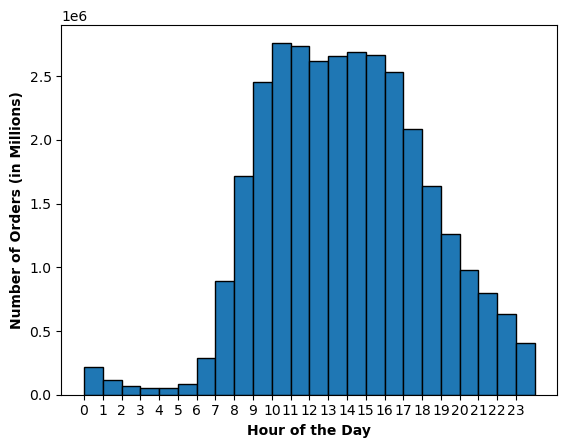

In [4]:
# Create a histogram of 'order_hour_of_day' with 24 bins
# Specify the bin edges to align bars with tick marks
bin_edges = range(0, 25)  # 25 bins, each representing an hour
hist_hour_of_day = ords_prods_custs['order_hour_of_day'].plot.hist(bins=bin_edges, edgecolor='k')  # 'k' for black edges

# Add axis labels
plt.xlabel('Hour of the Day', fontweight = 'bold')
plt.ylabel('Number of Orders (in Millions)', fontweight = 'bold')

# Set the x-axis ticks to be every 1 hour
plt.xticks(range(0, 24, 1))

# Show the plot
plt.show()

**Explanation:**
<br> This graph demonstrates the distribution of orders throughout the day.
<br> In the hour of 10 a.m. is the peak ordering time whereas 3 a.m. in the morning has the least orders.

In [5]:
# Export viz in the form of an png file

hist_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_hour_of_day.png'))

**4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.**

In [6]:
ords_prods_custs['loyalty_flag'].value_counts()

Regular customer    15874128
Loyal customer      10282763
New customer         6242841
Name: loyalty_flag, dtype: int64

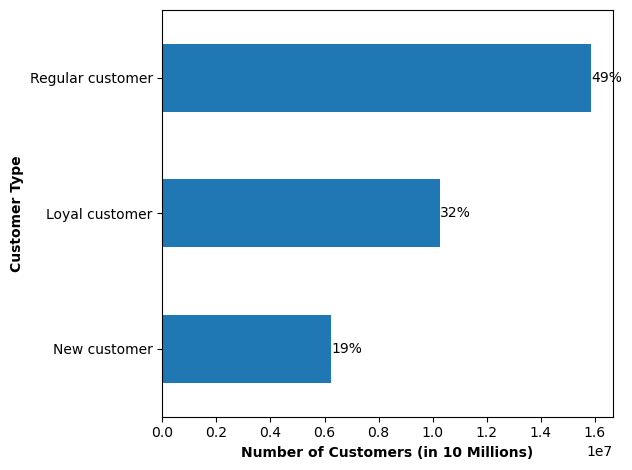

In [28]:
# Calculate the value counts for 'loyalty_flag'
loyalty_counts = ords_prods_custs['loyalty_flag'].value_counts()
loyalty_counts = loyalty_counts.sort_values(ascending = True)

# Create a horizontal bar chart
bar_loyalty_flag = loyalty_counts.plot.barh()

# Add labels to the axes
plt.xlabel('Number of Customers (in 10 Millions)', fontweight = 'bold')
plt.ylabel('Customer Type', fontweight = 'bold')

# Add percentages to each bar
total = loyalty_counts.sum()
for index, value in enumerate(loyalty_counts):
    percentage = (value / total) * 100
    plt.text(value, index, f'{percentage:.0f}%', ha='left', va='center')
    
# Adjusts the figure layout to ensure that the entire plot is visible within the saved image.
plt.tight_layout()

# Save the figure as a PNG image with specified dimensions and DPI
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_flag.png'), dpi=100, bbox_inches='tight')


**Explanation:**
<br> Almost half of the customers are identified as "regular customers" based on their maximum order. 

**5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)**

In [8]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

np.random.seed(4)
dev = np.random.rand(len(ords_prods_custs)) <= 0.7

In [9]:
# Store 70% of the sample in the dataframe big

big = ords_prods_custs[dev]

In [10]:
# Store 30% of the sample in the dataframe small

small = ords_prods_custs[~dev]

In [11]:
# Confirm the output

len(ords_prods_custs)

32399732

In [12]:
len(big)+len(small)

32399732

In [13]:
# To speed up the processing time even further, reduce the samples to only those columns necessary for the chart

df_2 = small[['order_hour_of_day','prices']]

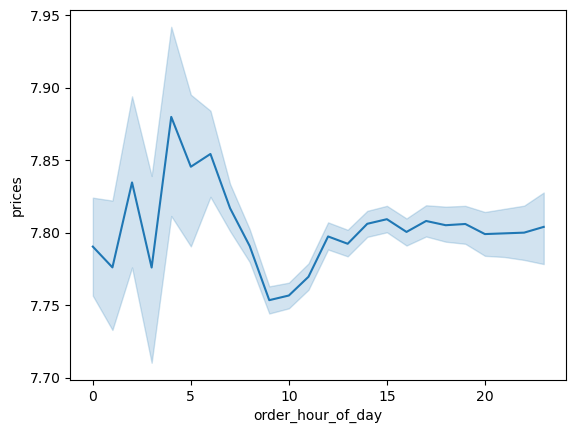

In [14]:
# Create a line chart

line_hour_prices = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

**Explanation:**
<br> Based off the sample above, there is no pattern or correlation between the ordering time and the expenditure.

In [15]:
# Export viz in the form of an .png file

line_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

**6. Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.**

In [16]:
#Create a subste

df_3 = small[['age','count_dependants']]

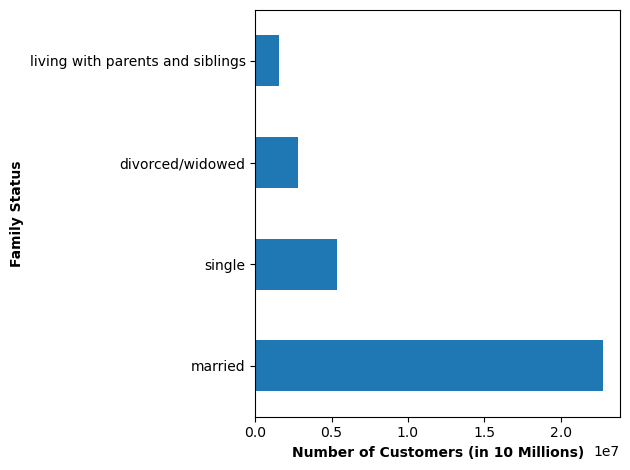

In [17]:
# Create a bar chart of "fam_status" column

fam_status_counts = ords_prods_custs['fam_status'].value_counts()
bar_fam_status = fam_status_counts.plot.barh()
plt.xlabel('Number of Customers (in 10 Millions)', fontweight = 'bold')
plt.ylabel('Family Status', fontweight = 'bold')

# Adjusts the figure layout to ensure that the entire plot is visible within the saved image.
plt.tight_layout()

# Save the figure as a PNG image with specified dimensions and DPI
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_status.png'), dpi=100, bbox_inches='tight')

**Insight:**
<br> The majority of our customers are married. 

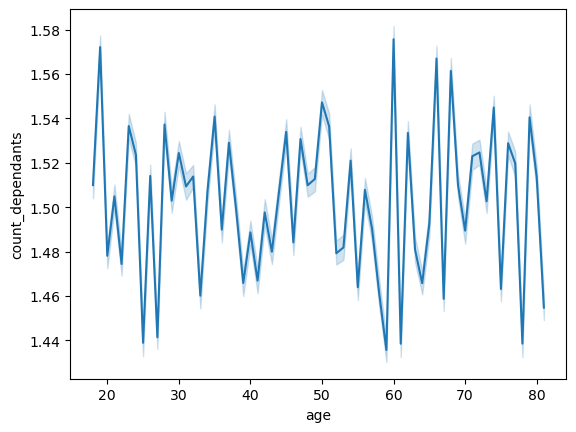

In [18]:
# Create a line chart

line_age_dependants = sns.lineplot(data = df_3, x = 'age', y = 'count_dependants')

**Insight:**
<br> There is no relation between age and number of dependants.

In [19]:
# Export the line chart

line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

**7. You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
In a markdown cell beneath your scatterplot, describe what the scatterplot shows.**

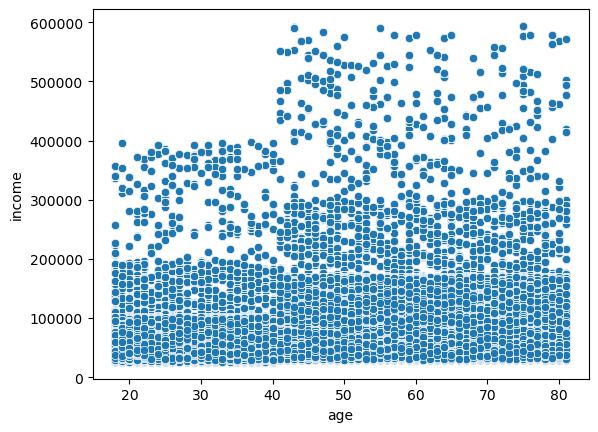

In [20]:
scatter_age_income_small = sns.scatterplot(x = 'age', y = 'income', data = small)

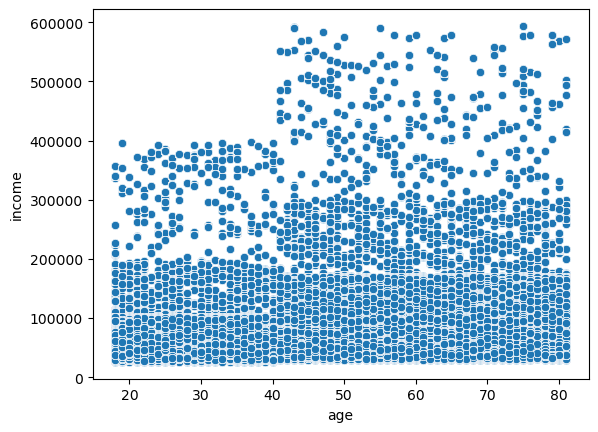

In [21]:
scatter_age_income_big = sns.scatterplot(x = 'age', y = 'income', data = big)

In [22]:
ords_prods_custs['income'].describe()

count    3.239973e+07
mean     9.941685e+04
std      4.300669e+04
min      2.590300e+04
25%      6.699600e+04
50%      9.660800e+04
75%      1.278840e+05
max      5.939010e+05
Name: income, dtype: float64

**Insight:**
<br> 1. Across all age groups, the majority of customers have an annual income below 200,000. 
<br> 2. However, there is a concentrated cluster of customers aged over 40 with incomes ranging between 200,000 and 300,000. 
<br> 3. Customers below 40 years of age have a maximum income around 400,000, whereas those older than 40 have a maximum income that reaches as high as 600,000.

In [23]:
# Export the viz

scatter_age_income_small.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income.png'))

**8. Export your visualizations as “.png” files in your relevant project folder.**

Done.

**9. Save your notebook from part 2 of this Exercise’s task.**

Done.